# Multiple Linear Regression
## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



## Step 1: Reading and Understanding the Data

Let us first import the required libraries and read the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Bikes_data = pd.read_csv("day.csv")
Bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Inspecting the data

In [4]:
Bikes_data.shape

(730, 16)

In [5]:
Bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
Bikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
Bikes_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Importing libraries for Visualisation

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

## Let's make a pairplot of all the numeric variables

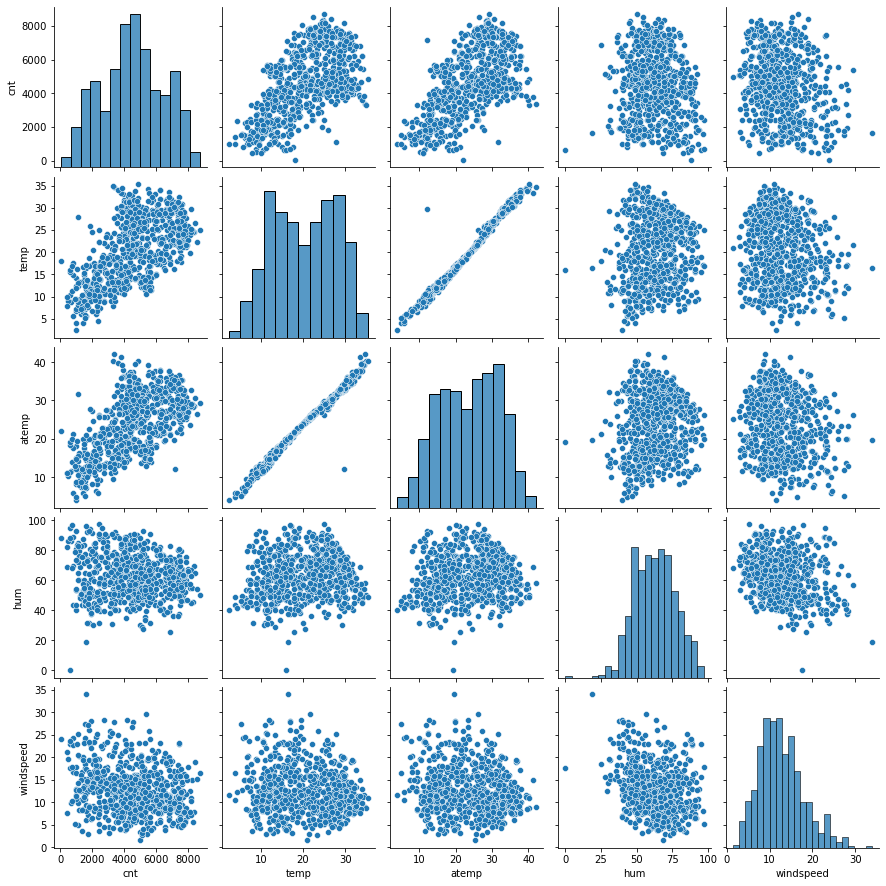

In [9]:
sns.pairplot(data=Bikes_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

- Above we can see that the relation between temp, atemp and cnt is Linear

#### Visualising Categorical Variables

- Visualising categorical variable by plotting Box plots

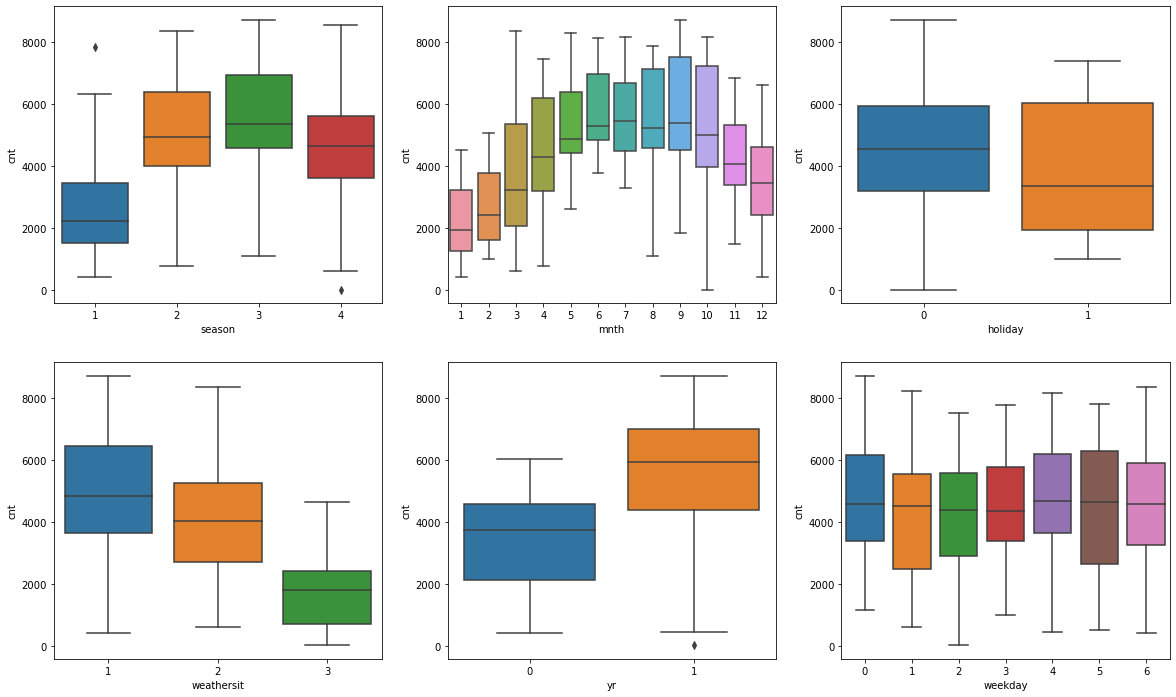

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bikes_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bikes_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bikes_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bikes_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = Bikes_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bikes_data)
plt.show()

- The no. of bikes shared i.e. count is least for spring
- The number of bikes shares increased in 2019
- The cnt has zero values for weather situation - category-4 = 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
- The cnt values increased in from 3rd mnth and the demand remains almost same till the month 10, but the highest cnt in mnth 9
- The cnt values are drops during holidays

# Data Preparation

### First we need to drop columns which are not required.

- By viewing data dictionary we can say that the following column - instant, dteday, casual, registered are not required

In [11]:
Bikes_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
Bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
import calendar

In [13]:
Bikes_data['mnth'] = Bikes_data['mnth'].apply(lambda x: calendar.month_abbr[x])
Bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
Bikes_data.season = Bikes_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [15]:
Bikes_data.weathersit = Bikes_data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [16]:
Bikes_data.weekday = Bikes_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [17]:
Bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

Now we need to create the dummy varibles for Season, mnth, weekday, weathersit

In [18]:
dummydf = Bikes_data[['season','mnth','weekday','weathersit']]

In [19]:
dummydf = pd.get_dummies(dummydf,drop_first=True )

In [20]:
#Adding variables to Bikes_data dataframes
Bikes_data = pd.concat([dummydf,Bikes_data],axis = 1)

In [21]:
Bikes_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thrusday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# Now we need to drop those columns for which dummy variables were created

In [23]:
Bikes_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [24]:
Bikes_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
Bikes_data.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [26]:
df_train, df_test = train_test_split(Bikes_data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the Features 

In [27]:
scaler = MinMaxScaler()

In [28]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [30]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


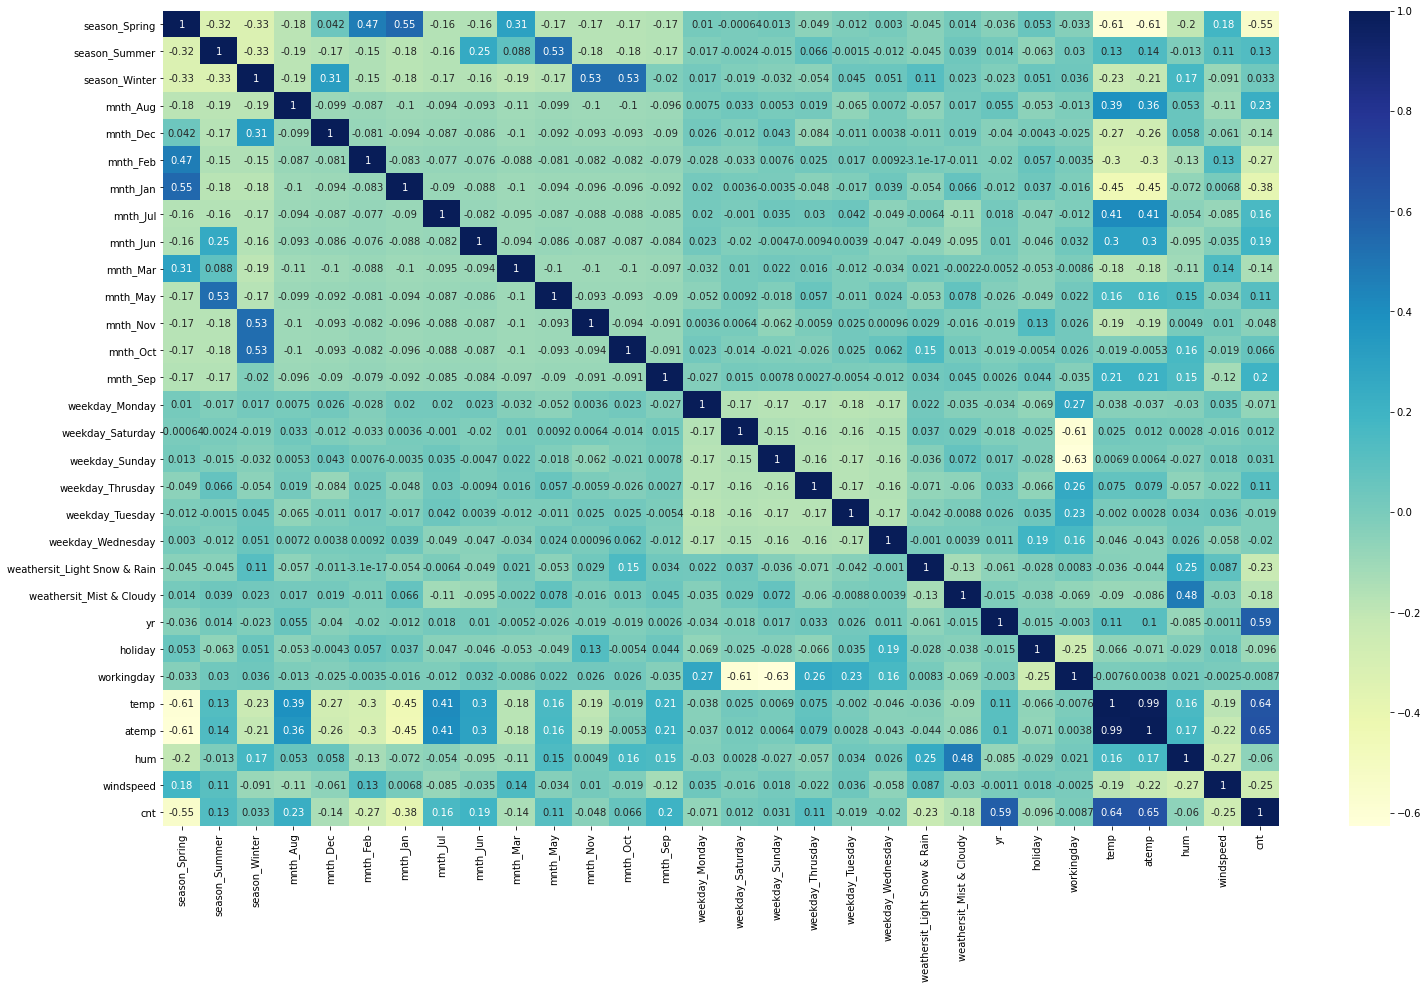

In [31]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

###  Model building

In [32]:
# Dividing into X and Y sets for the model building
y_df_train = df_train.pop('cnt')
X_df_train = df_train

## Step 6: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_df_train, y_df_train)

rfe = RFE(lm, 13)
rfe = rfe.fit(X_df_train, y_df_train)

In [34]:
list(zip(X_df_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 12),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 9),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 14),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', False, 6),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 15),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 13),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [35]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
a = X_df_train.columns[rfe.support_]
a

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [36]:
X_df_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thrusday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday', 'atemp'],
      dtype='object')

In [37]:
# Creating X_test dataframe with RFE selected variables
X_df_train_rfe = X_df_train[a]

In [38]:
# Adding a constant variable 
 
X_df_train_rfe = sm.add_constant(X_df_train_rfe)

In [39]:
# Creating the first fitted model

lm = sm.OLS(y_df_train,X_df_train_rfe).fit()

In [40]:
# Check the parameters obtained

lm.params

const                           0.295720
season_Spring                  -0.051791
season_Summer                   0.049088
season_Winter                   0.093078
mnth_Jan                       -0.033102
mnth_Jul                       -0.055924
mnth_Sep                        0.082481
weathersit_Light Snow & Rain   -0.240539
weathersit_Mist & Cloudy       -0.054123
yr                              0.230076
holiday                        -0.096813
temp                            0.512685
hum                            -0.166542
windspeed                      -0.187088
dtype: float64

In [41]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          4.45e-190
Time:                        22:49:37   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

- Droping the columns having p-value > 0.05 from the above table

In [42]:
X_df_train_new = X_df_train_rfe.drop(["season_Spring","mnth_Jan"], axis = 1)

# Model 2

In [43]:
# Adding a constant variable 
X_df_train_lm = sm.add_constant(X_df_train_new)

In [44]:
lm = sm.OLS(y_df_train,X_df_train_lm).fit()

In [45]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          3.89e-190
Time:                        22:49:38   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2257      0.027      8.368      0.000       0.173       0.279
season_Summer                    0.0803      0.011      7.457      0.000       0.059       0.102
season_Winter                    0.1357      0.011     12.870      0.000       0.115       0.156
mnth_Jul                        -0.0481      0.018     -2.658      0.008      -0.084      -0.013
mnth_Sep                         0.0959      0.016      5.945      0.000       0.064       0.128
weathersit_Light Snow & Rain    -0.2331      0.026     -8.809      0.000      -0.285      -0.181
weathersit_Mist & Cloudy        -0.0517      0.011     -4.904      0.000      -0.072      -0.031
yr                               0.2279      0.008     27.929      0.000       0.212       0.244
holiday                         -0.0994      0.026     -3.866      0.000      -0.150      -0.049
temp                             0.5978      0.023     26.505      0.000       0.553       0.642
hum                             -0.1825      0.038     -4.832      0.000      -0.257      -0.108
windspeed                       -0.1892      0.026     -7.343      0.000      -0.240      -0.139
==============================================================================
Omnibus:                       52.347   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.891
Skew:                          -0.598   Prob(JB):                     1.01e-23
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Now Calculating VIF

In [46]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_df_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,44.99
10,hum,1.87
9,temp,1.60
6,weathersit_Mist & Cloudy,1.55
3,mnth_Jul,1.43
1,season_Summer,1.33
2,season_Winter,1.29
5,weathersit_Light Snow & Rain,1.24
4,mnth_Sep,1.19
11,windspeed,1.18


- from above we can observe that we need to drop variable const as it has VIF value > 15

In [47]:
X_df_train_new = X_df_train_new.drop(['const'], axis=1)

In [48]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_df_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,hum,14.55
8,temp,10.20
10,windspeed,3.56
5,weathersit_Mist & Cloudy,2.11
6,yr,2.02
0,season_Summer,1.76
1,season_Winter,1.71
2,mnth_Jul,1.55
3,mnth_Sep,1.29
4,weathersit_Light Snow & Rain,1.16


## Model 3

In [49]:
 #dropping 'hum' from the model
X_df_train_new = X_df_train_new.drop(['hum'], axis=1)

In [50]:
# Adding a constant variable 
X_df_train_lm = sm.add_constant(X_df_train_new)

# Create a first fitted model
lm = sm.OLS(y_df_train,X_df_train_lm).fit()

In [51]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Tue, 02 Nov 2021   Prob (F-statistic):          2.09e-186
Time:                        22:49:39   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [52]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_df_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.06
9,windspeed,3.09
6,yr,2.01
0,season_Summer,1.75
2,mnth_Jul,1.52
5,weathersit_Mist & Cloudy,1.49
1,season_Winter,1.46
3,mnth_Sep,1.29
4,weathersit_Light Snow & Rain,1.08
7,holiday,1.04


### Residual Analysis of the train data

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
y_df_train_cnt = lm.predict(X_df_train_lm)

Text(0.5, 0, 'Errors')

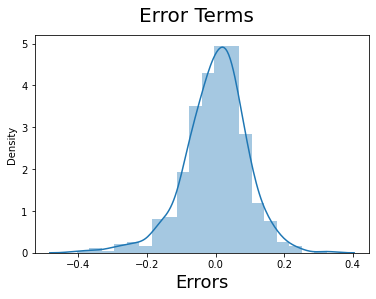

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_df_train - y_df_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

# Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

Applying the scaling on the test sets

In [57]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


df_test[num_vars] = scaler.transform(df_test[num_vars])

In [58]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


# Dividing into X_test and y_test

In [59]:
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [61]:
# predicting using values used by the final model
test_col = X_df_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Summer                 219 non-null    uint8  
 2   season_Winter                 219 non-null    uint8  
 3   mnth_Jul                      219 non-null    uint8  
 4   mnth_Sep                      219 non-null    uint8  
 5   weathersit_Light Snow & Rain  219 non-null    uint8  
 6   weathersit_Mist & Cloudy      219 non-null    uint8  
 7   yr                            219 non-null    int64  
 8   holiday                       219 non-null    int64  
 9   temp                          219 non-null    float64
 10  windspeed                     219 non-null    float64
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.5 KB


In [62]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test)

In [74]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7930780480135353

In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009827925333631271

### Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

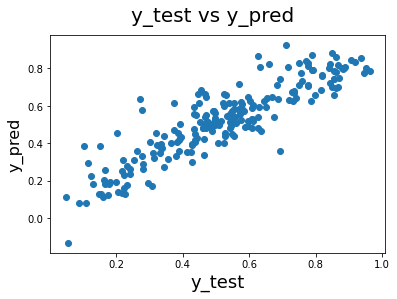

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)

In [73]:
boomdata = pd.DataFrame(lm.params)
boomdata.insert(0,'Variables',boomdata.index)
boomdata.rename(columns = {0:'Coefficient value'},inplace = True)
boomdata['index'] = list(range(0,11))
boomdata.set_index('index',inplace = True)
boomdata.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
boomdata

,Variables,Coefficient value
index,,
9,temp,0.570037
7,yr,0.232127
2,season_Winter,0.126393
0,const,0.122378
4,mnth_Sep,0.091721
1,season_Summer,0.078982
3,mnth_Jul,-0.040647
6,weathersit_Mist & Cloudy,-0.080797
8,holiday,-0.100493


- Here we can say that the variables which are having +ve sign says that the if it increases the target variable cnt will also increase.
- And that variables having -ve values will decrease the target varible when it get increased

- From above we can say that the temp is having the largest positive value, so it an important(significant) variable for the demands of bikes.
- weathersit_Light Snow & Rain has the lowest coefficient value, so it is inversely proportional to demand
- In winter the Rental demands increases
- On holidays there may be no demand 

-Thus the major factor which affects the bikes demands are - temp, Season, Month